<a href="https://colab.research.google.com/github/naokityokoyama/Projetos_Data_Science/blob/main/Kaggle_Poker.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
train = pd.read_csv('train.csv')

In [ ]:
test = pd.read_csv('test.csv')

In [ ]:
sub = pd.read_csv('/content/sampleSubmission.csv')

In [ ]:
train

,S1,C1,S2,C2,S3,C3,S4,C4,S5,C5,hand
0,4,9,2,1,2,2,4,7,2,8,0
1,1,4,3,6,1,12,3,11,2,7,0
2,1,11,4,1,3,7,4,11,2,1,2
3,2,9,2,4,3,6,1,9,4,9,3
4,1,8,2,4,2,11,2,2,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
25005,4,9,4,6,3,6,4,12,4,5,1
25006,3,8,3,5,4,11,2,2,1,13,0
25007,1,8,4,5,3,11,3,2,2,13,0
25008,4,12,3,5,2,1,2,7,4,6,0


In [ ]:
train.nunique()

S1       4
C1      13
S2       4
C2      13
S3       4
C3      13
S4       4
C4      13
S5       4
C5      13
hand    10
dtype: int64

In [ ]:
train.hand.value_counts()

0    12493
1    10599
2     1206
3      513
4       93
5       54
6       36
7        6
9        5
8        5
Name: hand, dtype: int64

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/li

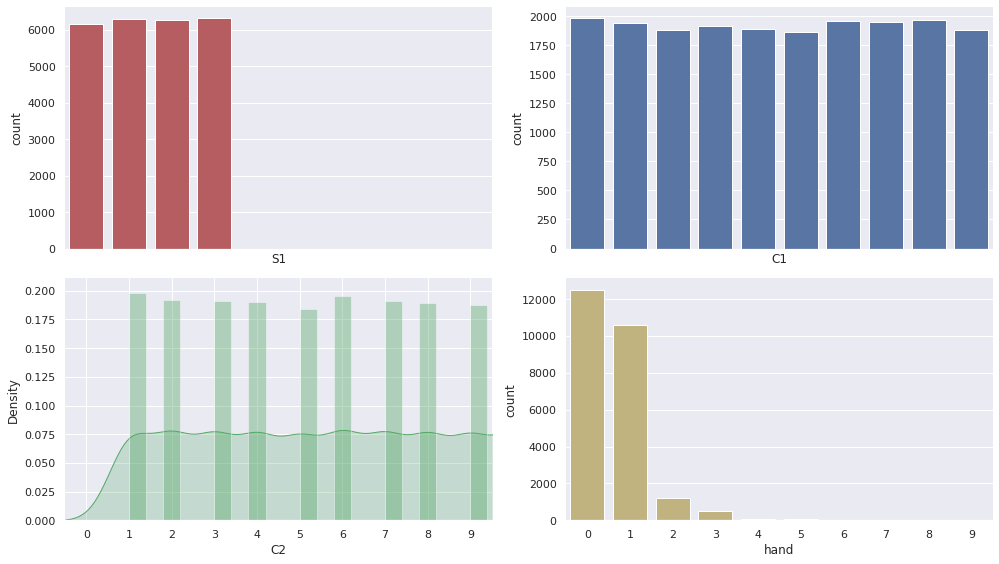

In [ ]:
f, ax = plt.subplots(2, 2, figsize=(14, 8), sharex=True)
sns.set()
sns.despine(left=True)

sns.countplot(train['S1'], color='r', ax=ax[0, 0])

sns.countplot(train['C1'], color='b', ax=ax[0, 1])

sns.distplot(train['C2'], color='g', kde_kws={'shade': True}, ax=ax[1, 0])

sns.countplot(train['hand'], color='y', ax=ax[1, 1])

plt.tight_layout()

In [ ]:
train['S2'].sum() , train['S1'].sum(), train['S3'].sum()

(62468, 62744, 62781)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold

In [ ]:
X = train.drop('hand', axis=1)
y = train.hand

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size=0.2, random_state=42, stratify=y)

In [ ]:
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
tree.score(X_train, y_train)

1.0

In [ ]:
tree.score(X_test, y_test)

0.5061975209916033

In [ ]:
rf = RandomForestClassifier(n_estimators=500, max_depth=20)
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=20, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
rf.score(X_test, y_test) , rf.score(X_train, y_train)

(0.6223510595761695, 1.0)

In [ ]:
kfold = KFold(n_splits=10, shuffle=True, random_state=42)

In [ ]:
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
gb.score(X_train, y_train), gb.score(X_test, y_test)

(0.6302978808476609, 0.6097560975609756)

In [ ]:
cv = cross_validate(gb, X_train, y_train, return_train_score=True, cv=kfold)

In [ ]:
cv['test_score'].mean()

0.6066073213393304

In [ ]:
Y = sub.hand

In [ ]:
cross_val_predict(gb, X_train, y_train, cv=kfold)

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [ ]:
Y_test = test.drop('id', axis=1)

In [ ]:
y_pred = gb.predict(Y_test)

In [ ]:
sub.hand = y_pred

In [ ]:
sub.to_csv('sub_poker.csv', index=False)

In [94]:
def score(estimador):
  estimador.fit(X_train, y_train)
  return estimador.score(X_test, y_test)

In [98]:
score(rf), score(gb)

(0.6181527389044382, 0.6097560975609756)